<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_13/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Основы построения многоканальных систем передачи. Системы передачи с частотным разделением каналов. Преобразование группового сигнала в канальные с последующим выделением первичных сигналов в приемном тракте системы передачи с частотным разделением каналов.</h1>

<h2>Представить отчет с графиками и комментариями по полученным с помощью приложенной программы распределениями сигналов во временной и частотной областях на каждом этапе их преобразования в передающем и приемном трактах многоканальной системы с частотным разделением каналов.</h2>

Временной интервал, мс 100
Число временных отсчетов (должно быть не менее  4800) 10000


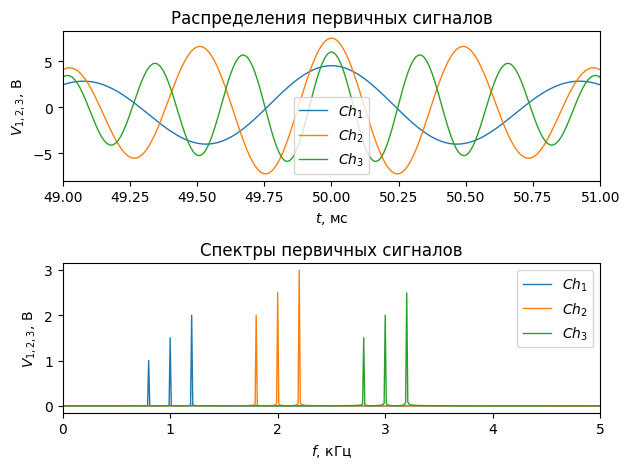

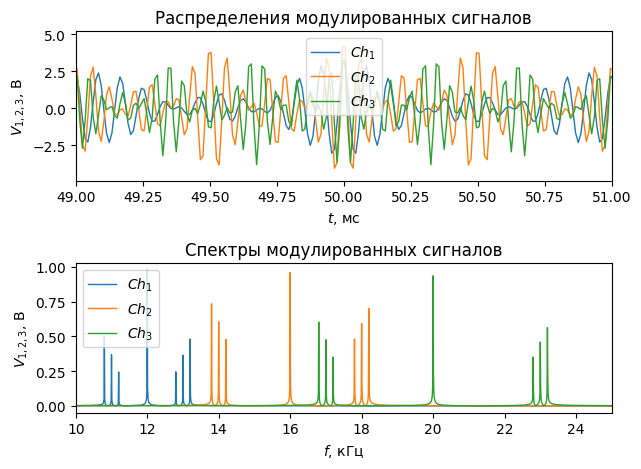

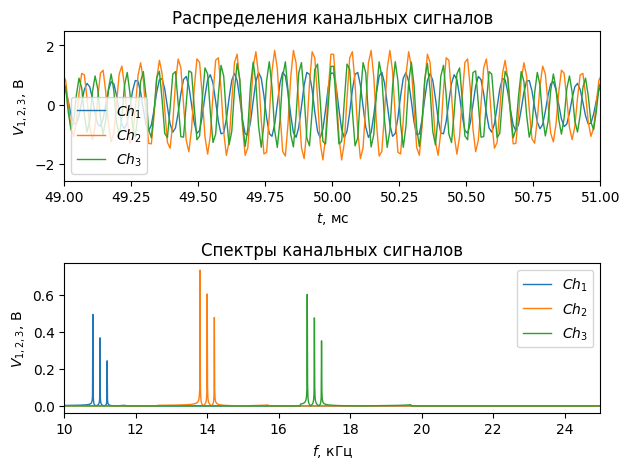

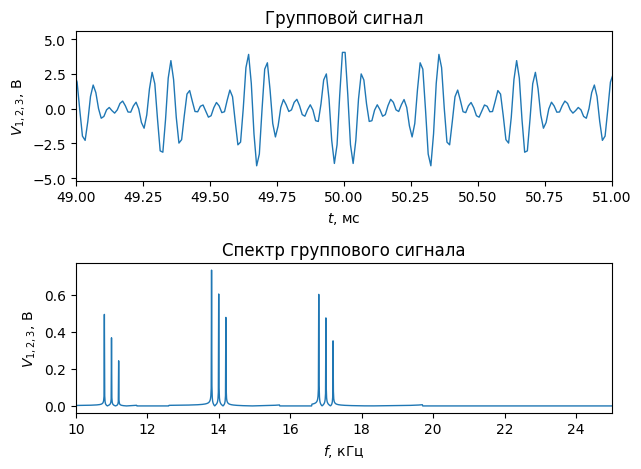

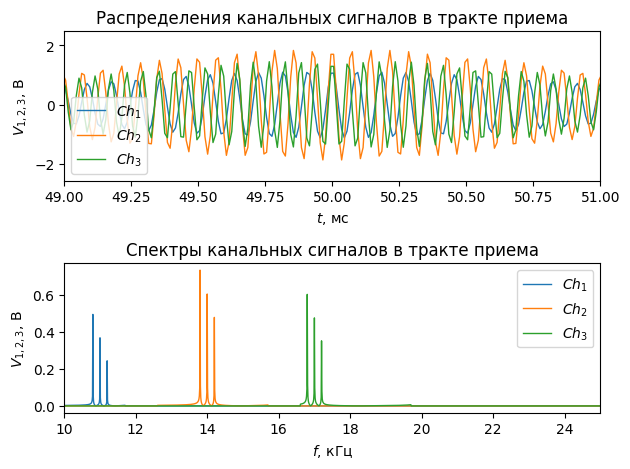

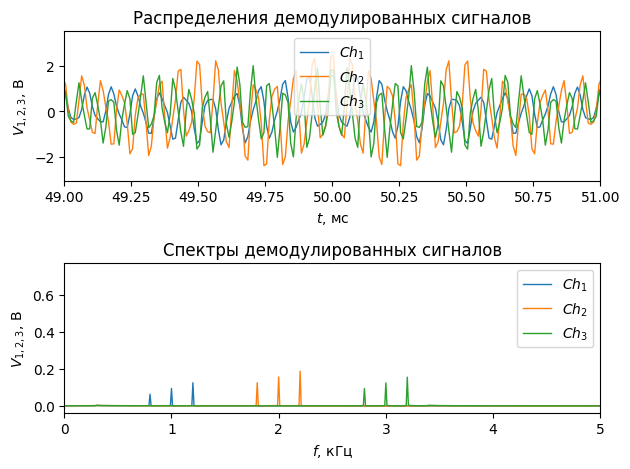

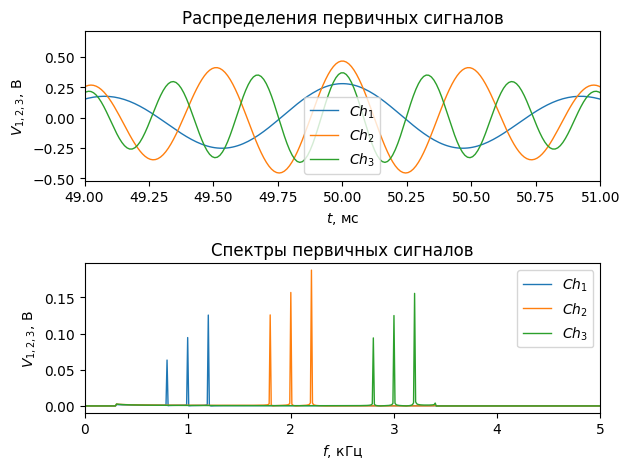

In [6]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

def f2w(f):
    return 2.0*pi*f

#Короткий широкополосный импульс
def wb_pulse(t, Tc, fn, fv):
    freq = (fv + fn) * 0.5
    dt = 1.0 / (fv-fn)
    return exp(-(0.5*Tc-t)**2/dt**2*0.5)*sin(2.0*pi*freq*t)

def filter(time, signal, fl, fh):
    n = len(signal)
    freq = np.fft.fftfreq(n, time[1]-time[0])
    spectr = np.fft.fft(signal)
    for i in range(n):
        if not fl <= abs(freq[i]) <= fh:
            spectr[i] *= 0+0j
    return np.fft.ifft(spectr)

pulse = False
auto_scale = True #Автомасштабирование графиков сигналов по времени

m = 0.5 #Коэффициент модуляции

fc = np.array([1.0, 2.0, 3.0])     #Частоты первичных гармонических сигналов в каналах 1, 2, 3 [кГц]
fn = np.array([12.0, 16.0, 20.0])  #Частоты сигналов-переносчиков в каналах 1, 2, 3 [кГц]

T = float(input('Временной интервал, мс '))
n = int(input('Число временных отсчетов (должно быть не менее {0: .0f}) '.format(48*T)))

#Массивы первичных сигналов, поступающих на вход каналов 1, 2, 3
sig1 = [0] * n
sig2 = [0] * n
sig3 = [0] * n

#Массивы модулированных первичных, канальных и группового сигналов в тракте передачи
mch1 = [0] * n
mch2 = [0] * n
mch3 = [0] * n

#Массив моментов времени для отсчетов сигналов
time = [0] * n

#Шаг дискретизации по времени
h = T / (n-1)

#Формирование первичных сигналов в каналах
for i in range(n):
    time[i] = i*h
    sig1[i] = 1.0*cos(f2w(fc[0]-0.2)*time[i])+1.5*cos(f2w(fc[0])*time[i])+2.0*cos(f2w(fc[0]+0.2)*time[i]) if not pulse else 20*wb_pulse(time[i], T, 0.3, 2.0)
    sig2[i] = 2.0*cos(f2w(fc[1]-0.2)*time[i])+2.5*cos(f2w(fc[1])*time[i])+3.0*cos(f2w(fc[1]+0.2)*time[i]) if not pulse else 20*wb_pulse(time[i], T, 1.3, 3.0)
    sig3[i] = 1.5*cos(f2w(fc[2]-0.2)*time[i])+2.0*cos(f2w(fc[2])*time[i])+2.5*cos(f2w(fc[2]+0.2)*time[i]) if not pulse else 20*wb_pulse(time[i], T, 2.3, 3.4)

#Модуляция первичных сигналов
for i in range(n):
    mch1[i] = (1.0 + m * sig1[i])*cos(f2w(fn[0])*time[i])
    mch2[i] = (1.0 + m * sig2[i])*cos(f2w(fn[1])*time[i])
    mch3[i] = (1.0 + m * sig3[i])*cos(f2w(fn[2])*time[i])

#Фильтрация модулированных сигналов (выделение НБП)
tch1 = filter(time, mch1, fn[0] - 3.4, fn[0]-0.3).real
tch2 = filter(time, mch2, fn[1] - 3.4, fn[1]-0.3).real
tch3 = filter(time, mch3, fn[2] - 3.4, fn[2]-0.3).real

#Формирование группового сигнала (суммирование канальных сигналов)
tgrp = np.array(tch1.real + tch2.real + tch3.real).real

#Расчет спектра сигалов
sp_freq = np.fft.fftfreq(n, T/n)

sp_sig1 = np.fft.fft(sig1)
sp_sig2 = np.fft.fft(sig2)
sp_sig3 = np.fft.fft(sig3)

sp_mch1 = np.fft.fft(mch1)
sp_mch2 = np.fft.fft(mch2)
sp_mch3 = np.fft.fft(mch3)

sp_tch1 = np.fft.fft(tch1)
sp_tch2 = np.fft.fft(tch2)
sp_tch3 = np.fft.fft(tch3)

sp_tgrp = np.fft.fft(tgrp)

#Спектры исходных первичных сигналов на входе СП ЧРК
sp_sig1 = np.hypot(sp_sig1.real, sp_sig1.imag)/n*2
sp_sig2 = np.hypot(sp_sig2.real, sp_sig2.imag)/n*2
sp_sig3 = np.hypot(sp_sig3.real, sp_sig3.imag)/n*2

#Спектры модулированных сигналов в каналах 1, 2, 3
sp_mch1 = np.hypot(sp_mch1.real, sp_mch1.imag)/n*2
sp_mch2 = np.hypot(sp_mch2.real, sp_mch2.imag)/n*2
sp_mch3 = np.hypot(sp_mch3.real, sp_mch3.imag)/n*2

#Спектры канальных сигналов до объединения
sp_tch1 = np.hypot(sp_tch1.real, sp_tch1.imag)/n*2
sp_tch2 = np.hypot(sp_tch2.real, sp_tch2.imag)/n*2
sp_tch3 = np.hypot(sp_tch3.real, sp_tch3.imag)/n*2

#Спектр группового сигнала на выъходе тракта передачи и входе в тракт приема
sp_tgrp = np.hypot(sp_tgrp.real, sp_tgrp.imag)/n*2

#Построение графиков сигналов и их спектров в передающем тракте
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения первичных сигналов')
ax0.plot(time, sig1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, sig2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, sig3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры первичных сигналов')
ax1.plot(sp_freq[0:n//2], sp_sig1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_sig2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_sig3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(0, 5)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения модулированных сигналов')
ax0.plot(time, mch1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, mch2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, mch3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры модулированных сигналов')
ax1.plot(sp_freq[0:n//2], sp_mch1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_mch2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_mch3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(10, 25)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения канальных сигналов')
ax0.plot(time, tch1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, tch2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, tch3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры канальных сигналов')
ax1.plot(sp_freq[0:n//2], sp_tch1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_tch2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_tch3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(10, 25)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Групповой сигнал')
ax0.plot(time, tgrp, 'tab:blue', lw =1)
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.set_title('Спектр группового сигнала')
ax1.plot(sp_freq[0:n//2], sp_tgrp[0:n//2], 'tab:blue', lw =1)
ax1.set_xlim(10, 25)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
fig.tight_layout()
#plt.show()

#Фильтрация группового сигнала с выделением канальных сигналов
rch1 = filter(time, tgrp, fn[0]-3.4, fn[0]-0.3).real
rch2 = filter(time, tgrp, fn[1]-3.4, fn[1]-0.3).real
rch3 = filter(time, tgrp, fn[2]-3.4, fn[2]-0.3).real

#Демодуляция канальных сигналов
for i in range(n):
    mch1[i] = (1.0 + m * cos(f2w(fn[0])*time[i]))*rch1[i]
    mch2[i] = (1.0 + m * cos(f2w(fn[1])*time[i]))*rch2[i]
    mch3[i] = (1.0 + m * cos(f2w(fn[2])*time[i]))*rch3[i]

#Канальные ФНЧ для выделения первичных сигналов
rsig1 = filter(time, mch1, 0.3, 3.4).real
rsig2 = filter(time, mch2, 0.3, 3.4).real
rsig3 = filter(time, mch3, 0.3, 3.4).real

#Спектры канальных сигналов после разделения
sp_rch1 = np.fft.fft(rch1)
sp_rch2 = np.fft.fft(rch2)
sp_rch3 = np.fft.fft(rch3)
sp_rch1 = np.hypot(sp_rch1.real, sp_rch1.imag)/n*2
sp_rch2 = np.hypot(sp_rch2.real, sp_rch2.imag)/n*2
sp_rch3 = np.hypot(sp_rch3.real, sp_rch3.imag)/n*2

#Спектры демодулированных сигналов в каналах 1, 2, 3
sp_mch1 = np.fft.fft(mch1)
sp_mch2 = np.fft.fft(mch2)
sp_mch3 = np.fft.fft(mch3)
sp_mch1 = np.hypot(sp_mch1.real, sp_mch1.imag)/n*2
sp_mch2 = np.hypot(sp_mch2.real, sp_mch2.imag)/n*2
sp_mch3 = np.hypot(sp_mch3.real, sp_mch3.imag)/n*2

#Спектры первичных сигналов, выделенных из канальных на выходе СП ЧРК
sp_rsig1 = np.fft.fft(rsig1)
sp_rsig2 = np.fft.fft(rsig2)
sp_rsig3 = np.fft.fft(rsig3)
sp_rsig1 = np.hypot(sp_rsig1.real, sp_rsig1.imag)/n*2
sp_rsig2 = np.hypot(sp_rsig2.real, sp_rsig2.imag)/n*2
sp_rsig3 = np.hypot(sp_rsig3.real, sp_rsig3.imag)/n*2

#Построение графиков сигналов и их спектров на приемном участке МСП ЧРК
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения канальных сигналов в тракте приема')
ax0.plot(time, rch1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, rch2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, rch3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры канальных сигналов в тракте приема')
ax1.plot(sp_freq[0:n//2], sp_rch1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_rch2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_rch3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(10, 25)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения демодулированных сигналов')
ax0.plot(time, mch1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, mch2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, mch3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры демодулированных сигналов')
ax1.plot(sp_freq[0:n//2], sp_mch1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_mch2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_mch3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax1.set_xlim(0, 5)
else:
    ax1.set_xlim(0, 50)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения первичных сигналов')
ax0.plot(time, rsig1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, rsig2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, rsig3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры первичных сигналов')
ax1.plot(sp_freq[0:n//2], sp_rsig1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_rsig2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_rsig3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(0, 5)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()
plt.show()

Временной интервал, мс 100
Число временных отсчетов (должно быть не менее  4800) 10000


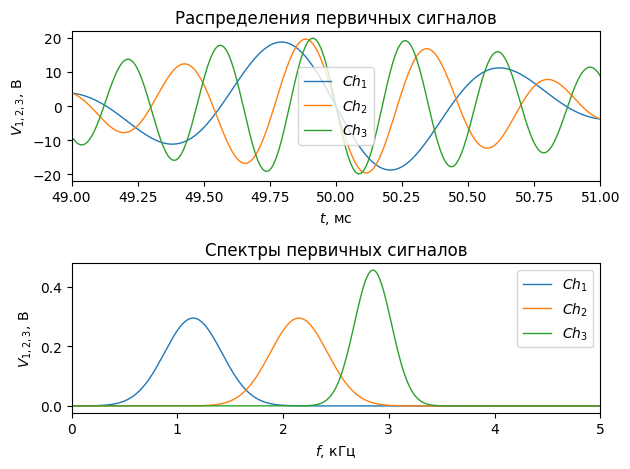

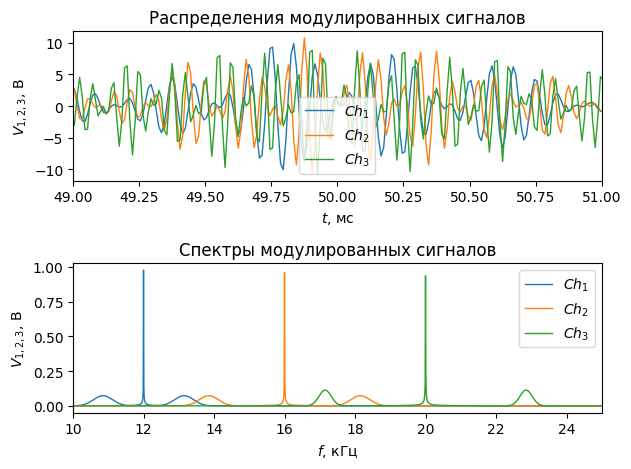

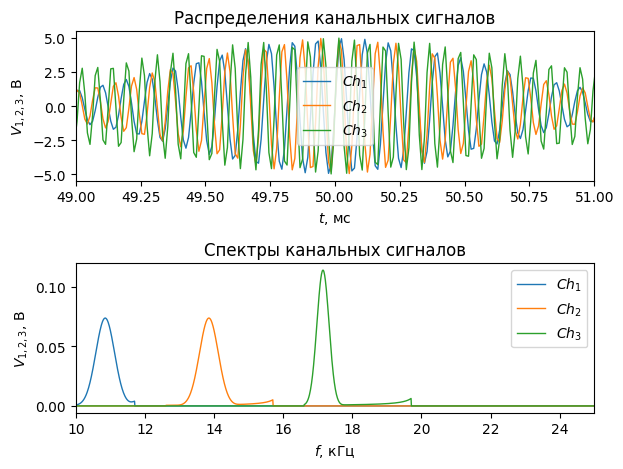

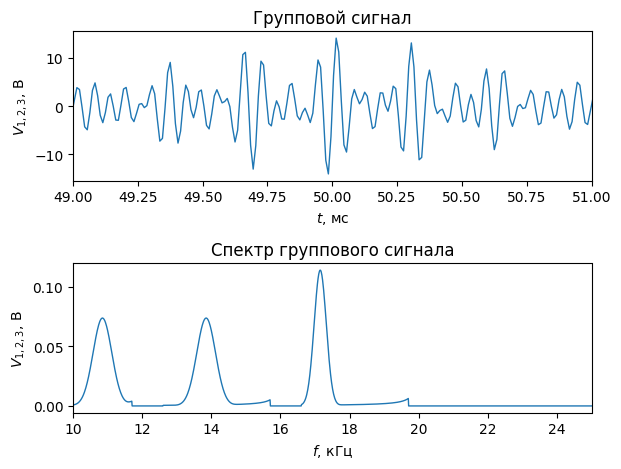

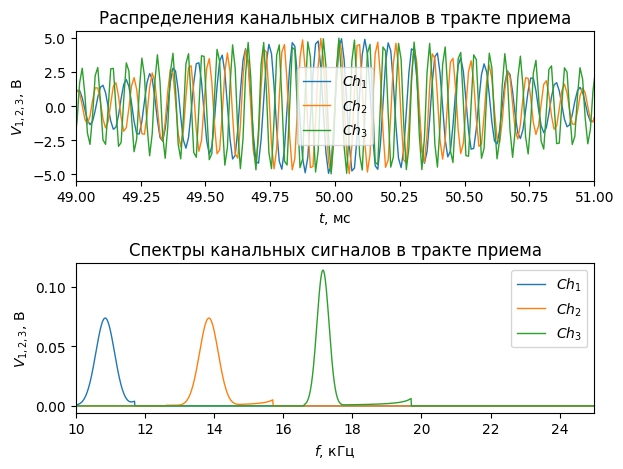

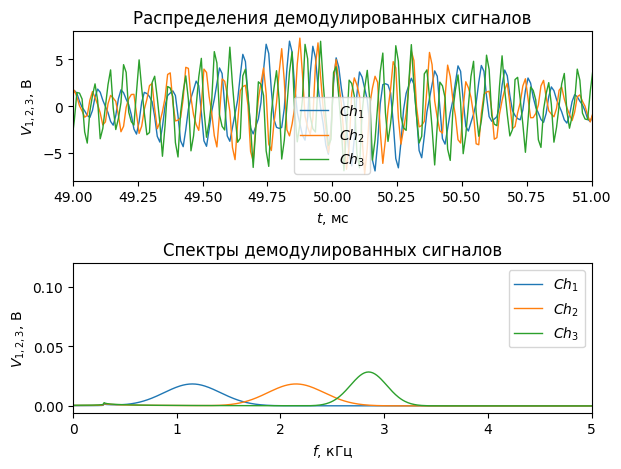

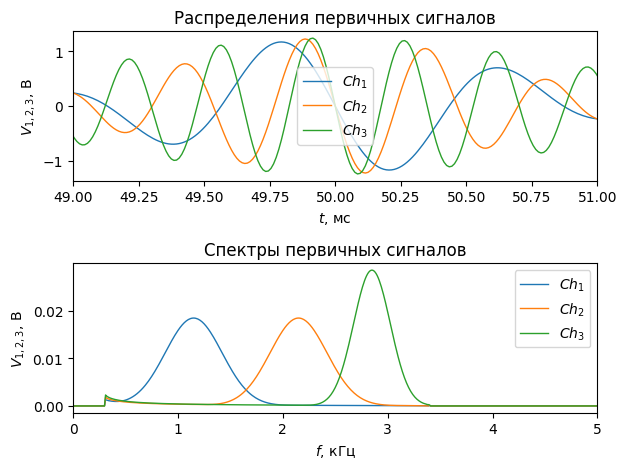

In [7]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

def f2w(f):
    return 2.0*pi*f

#Короткий широкополосный импульс
def wb_pulse(t, Tc, fn, fv):
    freq = (fv + fn) * 0.5
    dt = 1.0 / (fv-fn)
    return exp(-(0.5*Tc-t)**2/dt**2*0.5)*sin(2.0*pi*freq*t)

def filter(time, signal, fl, fh):
    n = len(signal)
    freq = np.fft.fftfreq(n, time[1]-time[0])
    spectr = np.fft.fft(signal)
    for i in range(n):
        if not fl <= abs(freq[i]) <= fh:
            spectr[i] *= 0+0j
    return np.fft.ifft(spectr)

pulse = True
auto_scale = True #Автомасштабирование графиков сигналов по времени

m = 0.5 #Коэффициент модуляции

fc = np.array([1.0, 2.0, 3.0])     #Частоты первичных гармонических сигналов в каналах 1, 2, 3 [кГц]
fn = np.array([12.0, 16.0, 20.0])  #Частоты сигналов-переносчиков в каналах 1, 2, 3 [кГц]

T = float(input('Временной интервал, мс '))
n = int(input('Число временных отсчетов (должно быть не менее {0: .0f}) '.format(48*T)))

#Массивы первичных сигналов, поступающих на вход каналов 1, 2, 3
sig1 = [0] * n
sig2 = [0] * n
sig3 = [0] * n

#Массивы модулированных первичных, канальных и группового сигналов в тракте передачи
mch1 = [0] * n
mch2 = [0] * n
mch3 = [0] * n

#Массив моментов времени для отсчетов сигналов
time = [0] * n

#Шаг дискретизации по времени
h = T / (n-1)

#Формирование первичных сигналов в каналах
for i in range(n):
    time[i] = i*h
    sig1[i] = 1.0*cos(f2w(fc[0]-0.2)*time[i])+1.5*cos(f2w(fc[0])*time[i])+2.0*cos(f2w(fc[0]+0.2)*time[i]) if not pulse else 20*wb_pulse(time[i], T, 0.3, 2.0)
    sig2[i] = 2.0*cos(f2w(fc[1]-0.2)*time[i])+2.5*cos(f2w(fc[1])*time[i])+3.0*cos(f2w(fc[1]+0.2)*time[i]) if not pulse else 20*wb_pulse(time[i], T, 1.3, 3.0)
    sig3[i] = 1.5*cos(f2w(fc[2]-0.2)*time[i])+2.0*cos(f2w(fc[2])*time[i])+2.5*cos(f2w(fc[2]+0.2)*time[i]) if not pulse else 20*wb_pulse(time[i], T, 2.3, 3.4)

#Модуляция первичных сигналов
for i in range(n):
    mch1[i] = (1.0 + m * sig1[i])*cos(f2w(fn[0])*time[i])
    mch2[i] = (1.0 + m * sig2[i])*cos(f2w(fn[1])*time[i])
    mch3[i] = (1.0 + m * sig3[i])*cos(f2w(fn[2])*time[i])

#Фильтрация модулированных сигналов (выделение НБП)
tch1 = filter(time, mch1, fn[0] - 3.4, fn[0]-0.3).real
tch2 = filter(time, mch2, fn[1] - 3.4, fn[1]-0.3).real
tch3 = filter(time, mch3, fn[2] - 3.4, fn[2]-0.3).real

#Формирование группового сигнала (суммирование канальных сигналов)
tgrp = np.array(tch1.real + tch2.real + tch3.real).real

#Расчет спектра сигалов
sp_freq = np.fft.fftfreq(n, T/n)

sp_sig1 = np.fft.fft(sig1)
sp_sig2 = np.fft.fft(sig2)
sp_sig3 = np.fft.fft(sig3)

sp_mch1 = np.fft.fft(mch1)
sp_mch2 = np.fft.fft(mch2)
sp_mch3 = np.fft.fft(mch3)

sp_tch1 = np.fft.fft(tch1)
sp_tch2 = np.fft.fft(tch2)
sp_tch3 = np.fft.fft(tch3)

sp_tgrp = np.fft.fft(tgrp)

#Спектры исходных первичных сигналов на входе СП ЧРК
sp_sig1 = np.hypot(sp_sig1.real, sp_sig1.imag)/n*2
sp_sig2 = np.hypot(sp_sig2.real, sp_sig2.imag)/n*2
sp_sig3 = np.hypot(sp_sig3.real, sp_sig3.imag)/n*2

#Спектры модулированных сигналов в каналах 1, 2, 3
sp_mch1 = np.hypot(sp_mch1.real, sp_mch1.imag)/n*2
sp_mch2 = np.hypot(sp_mch2.real, sp_mch2.imag)/n*2
sp_mch3 = np.hypot(sp_mch3.real, sp_mch3.imag)/n*2

#Спектры канальных сигналов до объединения
sp_tch1 = np.hypot(sp_tch1.real, sp_tch1.imag)/n*2
sp_tch2 = np.hypot(sp_tch2.real, sp_tch2.imag)/n*2
sp_tch3 = np.hypot(sp_tch3.real, sp_tch3.imag)/n*2

#Спектр группового сигнала на выъходе тракта передачи и входе в тракт приема
sp_tgrp = np.hypot(sp_tgrp.real, sp_tgrp.imag)/n*2

#Построение графиков сигналов и их спектров в передающем тракте
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения первичных сигналов')
ax0.plot(time, sig1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, sig2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, sig3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры первичных сигналов')
ax1.plot(sp_freq[0:n//2], sp_sig1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_sig2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_sig3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(0, 5)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения модулированных сигналов')
ax0.plot(time, mch1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, mch2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, mch3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры модулированных сигналов')
ax1.plot(sp_freq[0:n//2], sp_mch1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_mch2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_mch3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(10, 25)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения канальных сигналов')
ax0.plot(time, tch1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, tch2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, tch3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры канальных сигналов')
ax1.plot(sp_freq[0:n//2], sp_tch1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_tch2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_tch3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(10, 25)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Групповой сигнал')
ax0.plot(time, tgrp, 'tab:blue', lw =1)
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.set_title('Спектр группового сигнала')
ax1.plot(sp_freq[0:n//2], sp_tgrp[0:n//2], 'tab:blue', lw =1)
ax1.set_xlim(10, 25)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
fig.tight_layout()
#plt.show()

#Фильтрация группового сигнала с выделением канальных сигналов
rch1 = filter(time, tgrp, fn[0]-3.4, fn[0]-0.3).real
rch2 = filter(time, tgrp, fn[1]-3.4, fn[1]-0.3).real
rch3 = filter(time, tgrp, fn[2]-3.4, fn[2]-0.3).real

#Демодуляция канальных сигналов
for i in range(n):
    mch1[i] = (1.0 + m * cos(f2w(fn[0])*time[i]))*rch1[i]
    mch2[i] = (1.0 + m * cos(f2w(fn[1])*time[i]))*rch2[i]
    mch3[i] = (1.0 + m * cos(f2w(fn[2])*time[i]))*rch3[i]

#Канальные ФНЧ для выделения первичных сигналов
rsig1 = filter(time, mch1, 0.3, 3.4).real
rsig2 = filter(time, mch2, 0.3, 3.4).real
rsig3 = filter(time, mch3, 0.3, 3.4).real

#Спектры канальных сигналов после разделения
sp_rch1 = np.fft.fft(rch1)
sp_rch2 = np.fft.fft(rch2)
sp_rch3 = np.fft.fft(rch3)
sp_rch1 = np.hypot(sp_rch1.real, sp_rch1.imag)/n*2
sp_rch2 = np.hypot(sp_rch2.real, sp_rch2.imag)/n*2
sp_rch3 = np.hypot(sp_rch3.real, sp_rch3.imag)/n*2

#Спектры демодулированных сигналов в каналах 1, 2, 3
sp_mch1 = np.fft.fft(mch1)
sp_mch2 = np.fft.fft(mch2)
sp_mch3 = np.fft.fft(mch3)
sp_mch1 = np.hypot(sp_mch1.real, sp_mch1.imag)/n*2
sp_mch2 = np.hypot(sp_mch2.real, sp_mch2.imag)/n*2
sp_mch3 = np.hypot(sp_mch3.real, sp_mch3.imag)/n*2

#Спектры первичных сигналов, выделенных из канальных на выходе СП ЧРК
sp_rsig1 = np.fft.fft(rsig1)
sp_rsig2 = np.fft.fft(rsig2)
sp_rsig3 = np.fft.fft(rsig3)
sp_rsig1 = np.hypot(sp_rsig1.real, sp_rsig1.imag)/n*2
sp_rsig2 = np.hypot(sp_rsig2.real, sp_rsig2.imag)/n*2
sp_rsig3 = np.hypot(sp_rsig3.real, sp_rsig3.imag)/n*2

#Построение графиков сигналов и их спектров на приемном участке МСП ЧРК
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения канальных сигналов в тракте приема')
ax0.plot(time, rch1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, rch2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, rch3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры канальных сигналов в тракте приема')
ax1.plot(sp_freq[0:n//2], sp_rch1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_rch2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_rch3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(10, 25)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения демодулированных сигналов')
ax0.plot(time, mch1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, mch2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, mch3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры демодулированных сигналов')
ax1.plot(sp_freq[0:n//2], sp_mch1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_mch2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_mch3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax1.set_xlim(0, 5)
else:
    ax1.set_xlim(0, 50)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.set_title('Распределения первичных сигналов')
ax0.plot(time, rsig1, 'tab:blue', lw =1, label='$Ch_1$')
ax0.plot(time, rsig2, 'tab:orange', lw =1, label='$Ch_2$')
ax0.plot(time, rsig3, 'tab:green', lw =1, label='$Ch_3$')
if auto_scale:
    ax0.set_xlim(T/2-1, T/2+1)
else:
    ax0.set_xlim(time[0], time[-1])
ax0.set_xlabel("$t$, мс", fontsize=10)
ax0.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax0.legend(loc='best')
ax1.set_title('Спектры первичных сигналов')
ax1.plot(sp_freq[0:n//2], sp_rsig1[0:n//2], 'tab:blue', lw =1, label='$Ch_1$')
ax1.plot(sp_freq[0:n//2], sp_rsig2[0:n//2], 'tab:orange', lw =1, label='$Ch_2$')
ax1.plot(sp_freq[0:n//2], sp_rsig3[0:n//2], 'tab:green', lw =1, label='$Ch_3$')
ax1.set_xlim(0, 5)
ax1.set_xlabel("$f$, кГц", fontsize=10)
ax1.set_ylabel("$V_{1,2,3}$, В", fontsize=10)
ax1.legend(loc='best')
fig.tight_layout()
plt.show()

<h2>Дополнительное задание: реализовать модель системы передачи, с выделением нижней боковой полосы при формировании канальных сигналов.</h2>

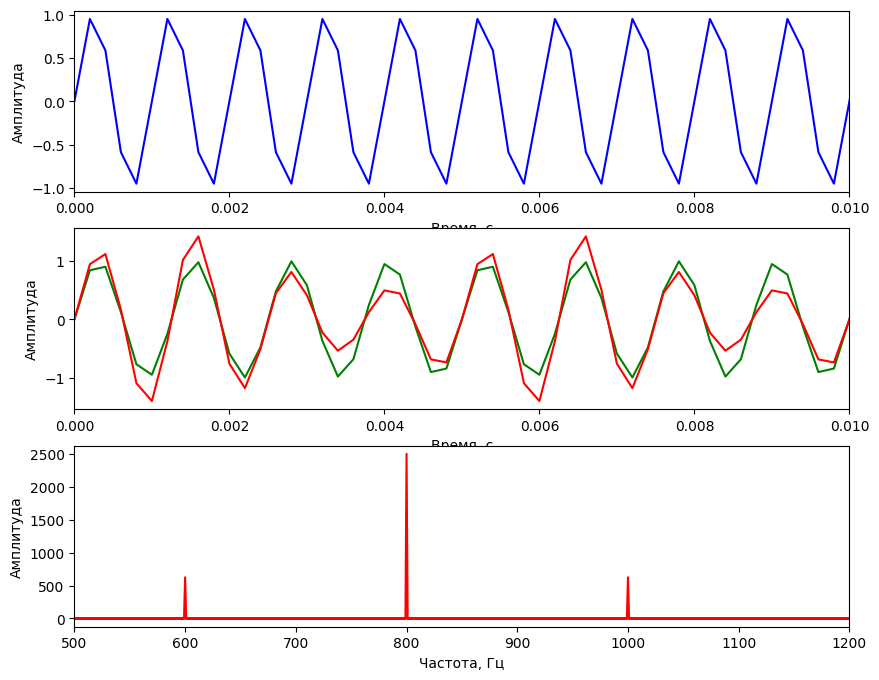

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем параметры сигнала
fs = 5000         # Частота дискретизации, Гц
duration = 1      # Длительность сигнала, с
freq = 1000       # Частота сигнала, Гц
amplitude = 1     # Амплитуда сигнала

# Генерируем сигнал
time = np.arange(0, duration, 1/fs)
signal = amplitude * np.sin(2*np.pi*freq*time)

# Определяем параметры модуляции
mod_freq = 200    # Частота модуляции, Гц
mod_index = 0.5   # Индекс модуляции

# Формируем сигнал LSB
carrier_freq = freq - mod_freq
signal_lsb = amplitude * np.sin(2*np.pi*carrier_freq*time)
signal_lsb_mod = signal_lsb * (1 + mod_index * np.sin(2*np.pi*mod_freq*time))

# Отображаем графики
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(time, signal, 'b-', label='Исходный сигнал')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.xlim(0,0.01)

plt.subplot(3,1,2)
plt.plot(time, signal_lsb, 'g-', label='Сигнал LSB')
plt.plot(time, signal_lsb_mod, 'r-', label='Модулированный сигнал LSB')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.xlim(0,0.01)

plt.subplot(3,1,3)
freq_range = np.fft.fftfreq(len(signal_lsb_mod), 1/fs)
signal_lsb_mod_freq = np.fft.fft(signal_lsb_mod)
plt.plot(freq_range, np.abs(signal_lsb_mod_freq), 'r-', label='Спектр модулированного сигнала LSB')
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.xlim([500, 1200])

plt.show()